# Data Loading 

Loading necessary GDrive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Installing image loading packages 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import cv2
from PIL import Image,ImageStat
import math
import pandas as pd
from scipy import ndimage
import matplotlib as plt

# Data Pre-Processing

Creating directory 

In [ ]:
DATADIR = "/content/drive/MyDrive/EDTS/KTP Classification /dataset_ktp"
CATEGORIES = ['fotocopy', 'real']

Luminance

In [ ]:
luminance_data = []

In [ ]:
def find_luminance():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = Image.open(os.path.join(path,img))
      stat = ImageStat.Stat(img_array)
      r,g,b = stat.rms
      lum = math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2))
      luminance_data.append([class_num, lum])

find_luminance()

In [ ]:
main_df = pd.DataFrame(luminance_data, columns = ['Photo Label', 'Luminance'])

R,G,B Mean 

In [ ]:
b_avg = []
g_avg = []
r_avg = []

In [ ]:
def find_rgb_avg():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and splits the RGB channels
      img_array = cv2.imread(os.path.join(path,img))
      b_arr, g_arr, r_arr = cv2.split(img_array)
      # Get the average of the rows of B values in a picture
      b_mean_row = np.average(b_arr, axis=0)
      g_mean_row = np.average(g_arr, axis=0)
      r_mean_row = np.average(r_arr, axis=0)
      # Average again the total B values in a single picture (X and Y)
      b = np.average(b_mean_row, axis = 0)
      g = np.average(g_mean_row, axis = 0)
      r = np.average(r_mean_row, axis = 0)
      # Append values to the list 
      b_avg.append(b)
      g_avg.append(g)
      r_avg.append(r)
      
find_rgb_avg() 

In [ ]:
main_df['R Mean'] = r_avg
main_df['G Mean'] = g_avg
main_df['B Mean'] = b_avg

In [ ]:
main_df.head()

,Photo Label,Luminance,R Mean,G Mean,B Mean
0,0,108.015872,94.084645,89.826063,89.760041
1,0,152.420934,147.113395,145.296944,143.911775
2,0,175.078256,185.539143,169.691959,156.873306
3,0,124.114468,114.699943,110.439527,109.353926
4,0,105.774837,100.529764,101.124736,100.981274


R,G,B Variance

In [ ]:
b_var = []
g_var = []
r_var = []

In [ ]:
def find_rgb_var():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = cv2.imread(os.path.join(path,img))
      b_arr, g_arr, r_arr = cv2.split(img_array)
      # Finding variance using scipy package
      b  = ndimage.variance(b_arr)
      g = ndimage.variance(g_arr)
      r = ndimage.variance(r_arr)
      # Append values to list 
      b_var.append(b)
      g_var.append(g)
      r_var.append(r)
      
find_rgb_var()

In [ ]:
main_df['R Variance'] = r_var
main_df['G Variance'] = g_var
main_df['B Variance'] = b_var

Gray Variance

In [ ]:
var_gray = []

In [ ]:
def find_gray_var():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      laplacian = ndimage.laplace(img_array).var()
      var_gray.append(laplacian)

find_gray_var()

In [ ]:
main_df['Gray Variance'] = var_gray

Blur 

In [ ]:
blur_val = []

In [ ]:
def find_blur():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = cv2.imread(os.path.join(path,img))
      blur = cv2.Laplacian(img_array, cv2.CV_64F).var()
      blur_val.append(blur)

find_blur()

In [ ]:
main_df['Blur'] = blur_val

Sharpness

In [ ]:
sharpness = []

In [ ]:
def find_sharpness():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = cv2.imread(os.path.join(path,img))
      img_HLS_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2HLS)
      L = img_HLS_array[:, :, 1]
      u = np.mean(L)
      LP = cv2.Laplacian(L, cv2.CV_64F).var()
      sharp = np.sum(LP / u)
      sharpness.append(sharp)

find_sharpness()

In [ ]:
main_df['Sharpness'] = sharpness

Distinct Pixel Rate 

In [ ]:
resolution = []

In [ ]:
def find_resolution():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = cv2.imread(os.path.join(path,img))
      height, width = img_array.shape[:2]
      distinct_pix = height * width

      resolution.append(distinct_pix)

find_resolution()

In [ ]:
main_df['Resolution'] = resolution

Saturation

In [ ]:
saturation = []

In [ ]:
def find_saturation():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = cv2.imread(os.path.join(path,img))
      img_HLS_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2HLS)
      sat = img_HLS_array[:, :, 1].mean()
      
      saturation.append(sat)

find_saturation()

In [ ]:
main_df['Saturation'] = saturation

Colorfulness

In [ ]:
colorfulness = []

In [ ]:
def find_colorfulness():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = cv2.imread(os.path.join(path,img))
      # split the image into its respective RGB components
      (B, G, R) = cv2.split(img_array.astype("float"))
      # compute rg = R - G
      rg = np.absolute(R - G)
      # compute yb = 0.5 * (R + G) - B
      yb = np.absolute(0.5 * (R + G) - B)
      # compute the mean and standard deviation of both `rg` and `yb`
      (rbMean, rbStd) = (np.mean(rg), np.std(rg))
      (ybMean, ybStd) = (np.mean(yb), np.std(yb))
      # combine the mean and standard deviations
      stdRoot = np.sqrt((rbStd ** 2) + (ybStd ** 2))
      meanRoot = np.sqrt((rbMean ** 2) + (ybMean ** 2))
      # derive the "colorfulness" metric and return it
      colorful = stdRoot + (0.3 * meanRoot)
      
      colorfulness.append(colorful)

find_colorfulness()

In [ ]:
main_df['Colorfulness'] = colorfulness

Printing the DataFrame Constructed

In [ ]:
main_df.head()

,Photo Label,Luminance,R Mean,G Mean,B Mean,R Variance,G Variance,B Variance,Gray Variance,Blur,Sharpness,Resolution,Saturation,Colorfulness
0,0,108.015872,94.084645,89.826063,89.760041,3140.660225,3457.591306,3891.504497,11394.115528,979.797994,10.668554,111040,92.011807,6.582818
1,0,152.420934,147.113395,145.296944,143.911775,1960.778592,2030.408707,2065.324670,7847.201504,3587.070781,24.669289,64800,145.665772,3.851335
2,0,175.078256,185.539143,169.691959,156.873306,772.147733,789.514703,819.591336,13014.157600,551.180912,3.229098,49000,171.468143,11.803814
3,0,124.114468,114.699943,110.439527,109.353926,2667.221786,3094.870946,3111.011797,13895.018146,196.655125,1.755649,70560,112.047222,6.311370
4,0,105.774837,100.529764,101.124736,100.981274,986.460310,996.568841,994.046831,12009.326236,1187.462301,11.775583,55806,100.832581,1.652960


# Model Building

Installing all necessary packages 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics

Shuffling dataset

In [ ]:
# Randomize the sequence of data
main_df = shuffle(main_df).reset_index(drop = True)
main_df.head()

,Photo Label,Luminance,R Mean,G Mean,B Mean,R Variance,G Variance,B Variance,Gray Variance,Blur,Sharpness,Resolution,Saturation,Colorfulness
0,0,126.455832,120.057856,123.801192,118.591961,954.760485,969.415793,1039.857929,14273.799376,263.308577,2.186666,71280,120.582323,6.197884
1,1,160.437566,152.947675,152.949296,145.021118,2983.672689,2364.082006,2249.567373,10173.548504,2056.289605,13.698362,123402,150.158231,41.677390
2,0,153.181507,143.855147,148.266367,148.194645,1789.391300,1796.453005,1792.306902,11698.960529,1497.754045,10.211038,80896,146.791893,4.562584
3,1,174.850611,131.359561,177.650519,176.642952,1835.438628,2681.397451,2685.938448,9698.558419,2118.056843,13.512918,75200,156.051104,38.147720
4,1,190.564001,138.429331,192.199940,212.432796,2203.446081,3378.997001,3291.848709,10343.720250,9370.172568,52.265108,16740,175.654241,40.275522


In [ ]:
main_df.to_csv('Processed Dataframe.csv', index = False)

Creating Model

In [ ]:
# Define X and Y variables
X = main_df.drop(columns= ['Photo Label']).values # use all 13 variables
Y = main_df[['Photo Label']].values # 1 output: Classifying if it is real or fake. 0 = fotocopy, 1 = real 

In [ ]:
# Standardize data (since different scales for each variables)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 50)

In [ ]:
# Fitting KNN Model to Train
dt = DecisionTreeClassifier()
DT_model_1 = dt.fit(X_train, Y_train.ravel())

In [ ]:
# Cross Validation of Model 
scores = cross_val_score(DT_model_1, X_train, Y_train, cv=5)
print(scores)

[1.         0.99295775 1.         0.98591549 0.97887324]


In [ ]:
# Predicting Y 
Y_pred = DT_model_1.predict(X_test)
print(Y_pred)

[1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0
 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1
 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1
 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1
 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1
 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1
 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1
 0 0 0 1 1 0 1 1 0]


In [ ]:
# Checking performance with classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       174

    accuracy                           1.00       305
   macro avg       1.00      1.00      1.00       305
weighted avg       1.00      1.00      1.00       305



In [ ]:
# Checking performance using ROC Score
roc_auc_score(Y_test, Y_pred)

1.0

# Training and Predicting

Pruning our Decision Tree 

In [ ]:
# Several list variables that are empty where values will be appended 
max_depth=[]
acc_gini=[]
acc_entropy=[]

In [ ]:
# Max depth will be in the range of until 30 
for i in range(1,30):
    dt_test = DecisionTreeClassifier(criterion='gini',max_depth = i)
    dt_test.fit(X_train,Y_train)
    pred = dt_test.predict(X_test)
    
    acc_gini.append(accuracy_score(Y_test,pred))
    
    dt_test = DecisionTreeClassifier(criterion='entropy',max_depth = i)
    dt_test.fit(X_train,Y_train)
    pred = dt_test.predict(X_test)
    
    acc_entropy.append(accuracy_score(Y_test,pred))
    
    max_depth.append(i)
    
    dt_param_df = pd.DataFrame({'acc_gini': pd.Series(acc_gini),
                   'acc_entropy': pd.Series(acc_entropy),
                   'max_depth': pd.Series(max_depth)})

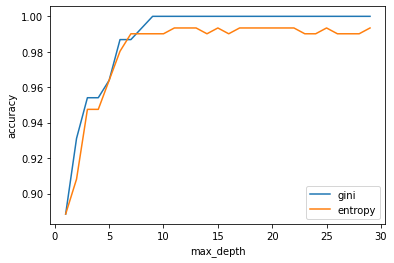

In [ ]:
# Visualization of the pruning
plt.plot('max_depth','acc_gini', data = dt_param_df, label='gini')
plt.plot('max_depth','acc_entropy', data = dt_param_df, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

Hyperparameter tuning DT 

In [ ]:
# Construct the hyperparameters we want to check whether or not it will make good DT
criterion=['gini', 'entropy']
max_depth=[1,6,8,11]
min_samples_split=[1,9,11,12]
min_samples_leaf=[1,3,7,9]
param_grid={'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'criterion':criterion}

In [ ]:
# Change parameters to a dictionary
param = dict(criterion = 'criterion',
             max_depth = 'max_depth', 
             min_samples_split = 'min_samples_split',
             min_samples_leaf = 'min_samples_leaf')

In [ ]:
# Finding the best parameters using GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(),
                    param_grid,
                    n_jobs =- 1,
                    cv = 3,
                    verbose = 200)
grid.fit(X_train,Y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
96 fits failed out of a total of 384.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a float 

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 6, 8, 11],
                         'min_samples_leaf': [1, 3, 7, 9],
                         'min_samples_split': [1, 9, 11, 12]},
             verbose=200)

In [ ]:
# Getting best parameters
grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 11}

In [ ]:
# Getting best accuracy 
grid.best_score_

0.969057665260197

Predicting with best model 

In [ ]:
# Constructing best model 
DT_model_2 = DecisionTreeClassifier(criterion = 'gini', 
                                    max_depth = 6, 
                                    min_samples_leaf = 1, 
                                    min_samples_split = 9)

DT_model_2.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=9)

In [ ]:
# Predicting using best model 
DT_model_2_pred = DT_model_2.predict(X_test)

In [ ]:
# Seeing accuracy 
print(classification_report(Y_test, DT_model_2_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       131
           1       0.98      0.99      0.99       174

    accuracy                           0.98       305
   macro avg       0.98      0.98      0.98       305
weighted avg       0.98      0.98      0.98       305



In [ ]:
# Getting cross_val score 
from sklearn.model_selection import cross_val_score
print(cross_val_score(DT_model_2, X_test, Y_test, cv=5))

[0.90163934 0.95081967 0.8852459  0.96721311 0.95081967]


In [ ]:
# AUC (Area under curve) Score 
fpr, tpr, thresholds = metrics.roc_curve(Y_test, DT_model_2_pred)
print(metrics.auc(fpr, tpr))

0.973615252552634


In [ ]:
X_label = main_df.drop(columns= ['Photo Label'])

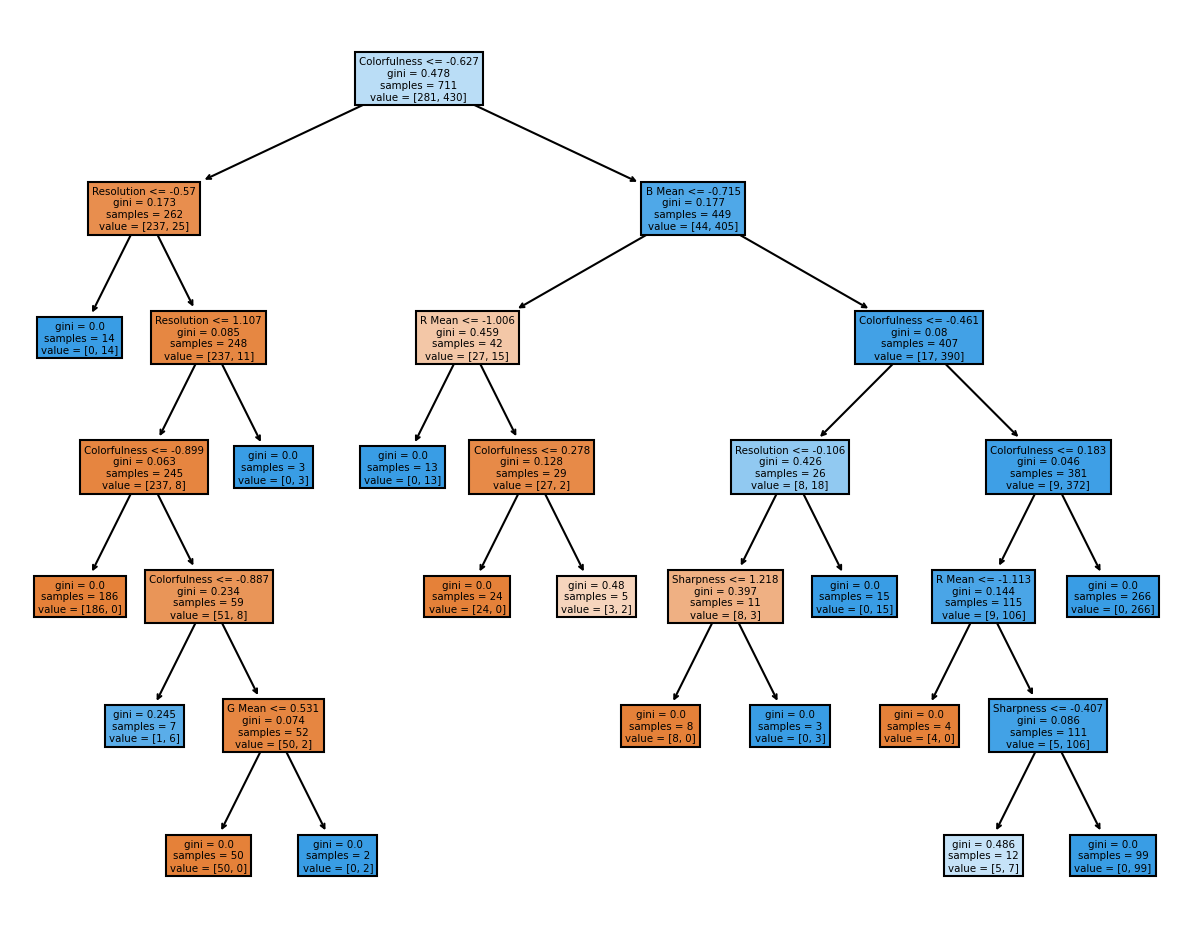

In [ ]:
# Showing loss by visualizing DT and seeing Gini per leaf 
plt.figure(figsize=(10,8), dpi=150)
plot_tree(DT_model_2,feature_names = X_label.columns, filled=True);

Save best model in checkpoint 

In [ ]:
import joblib 

In [ ]:
# save the model to disk
filename = 'DT_finalized_model.sav'
joblib.dump(DT_model_2, filename)

['DT_finalized_model.sav']